In [168]:
from google.colab import drive

drive.mount('/content/drive')
root_path = 'drive/My Drive/Deep_Learning_Udemy/Visualizing_feature_maps-2/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms, utils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import  Image
import json
% matplotlib inline

In [0]:
transform = transforms.Compose([
                                transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

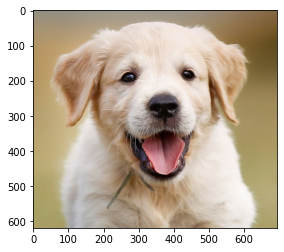

In [171]:
PATH = '/content/drive/My Drive/Deep_Learning_Udemy/Visualizing_feature_maps-2/'
image = Image.open(PATH +str('dog.jpg'))
plt.imshow(image)

In [172]:
# load the model
model = models.resnet18(pretrained=True)
print(model)
 
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the 49 conv layers in this list
 
# get all the model children as list
model_children = list(model.children())
# counter to keep count of the conv layers
counter = 0 
 
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [173]:
#resnet.classifier[-1] #resnet.classifier[6]
# resnet.fc
# model_weights
conv_layers

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False),
 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False),
 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False),
 Conv2d(256, 256, kernel_siz

In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [0]:
# Apply transformation on image
image = transform(image)

In [0]:
# Add the batch size
image = image.unsqueeze(0)

In [0]:
# Wrap it up in a Variable
image = Variable(image)

In [0]:
# Transfer it to GPU
image = image.to(device)

In [179]:
print(image.shape)

torch.Size([1, 3, 224, 224])


In [0]:
output = model(image)

In [181]:
output.shape

torch.Size([1, 1000])

In [0]:
# Transfer the 2D tensor to 1D
output = output.squeeze(0)

In [183]:
output.shape

torch.Size([1000])

In [0]:
labels = json.load(open(PATH+str('imagenet_class_index.json')))

In [0]:
index = torch.max(output,0)

In [0]:
index = str(index[1].item())

In [0]:
label = labels[index][1]

In [0]:
# Process image to every layer and append output and name of the layer to outputs[] and names[] lists
outputs = []
names = []
for layer in conv_layers[0:]:
  image = layer(image)
  outputs.append(image)
  names.append(str(layer))

In [189]:
# Print feature maps
for feature_map in outputs:
  print(feature_map.shape)
print(len(outputs))

torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
17


In [0]:
processed = []
for feature_map in outputs:
  feature_map = feature_map.squeeze(0)
  #Convert 3D tensor to 2D, Sum the same element of every channel
  gray_scale = torch.sum(feature_map, 0)
  gray_scale = gray_scale / feature_map.shape[0]
  processed.append(gray_scale.data.cpu().numpy())

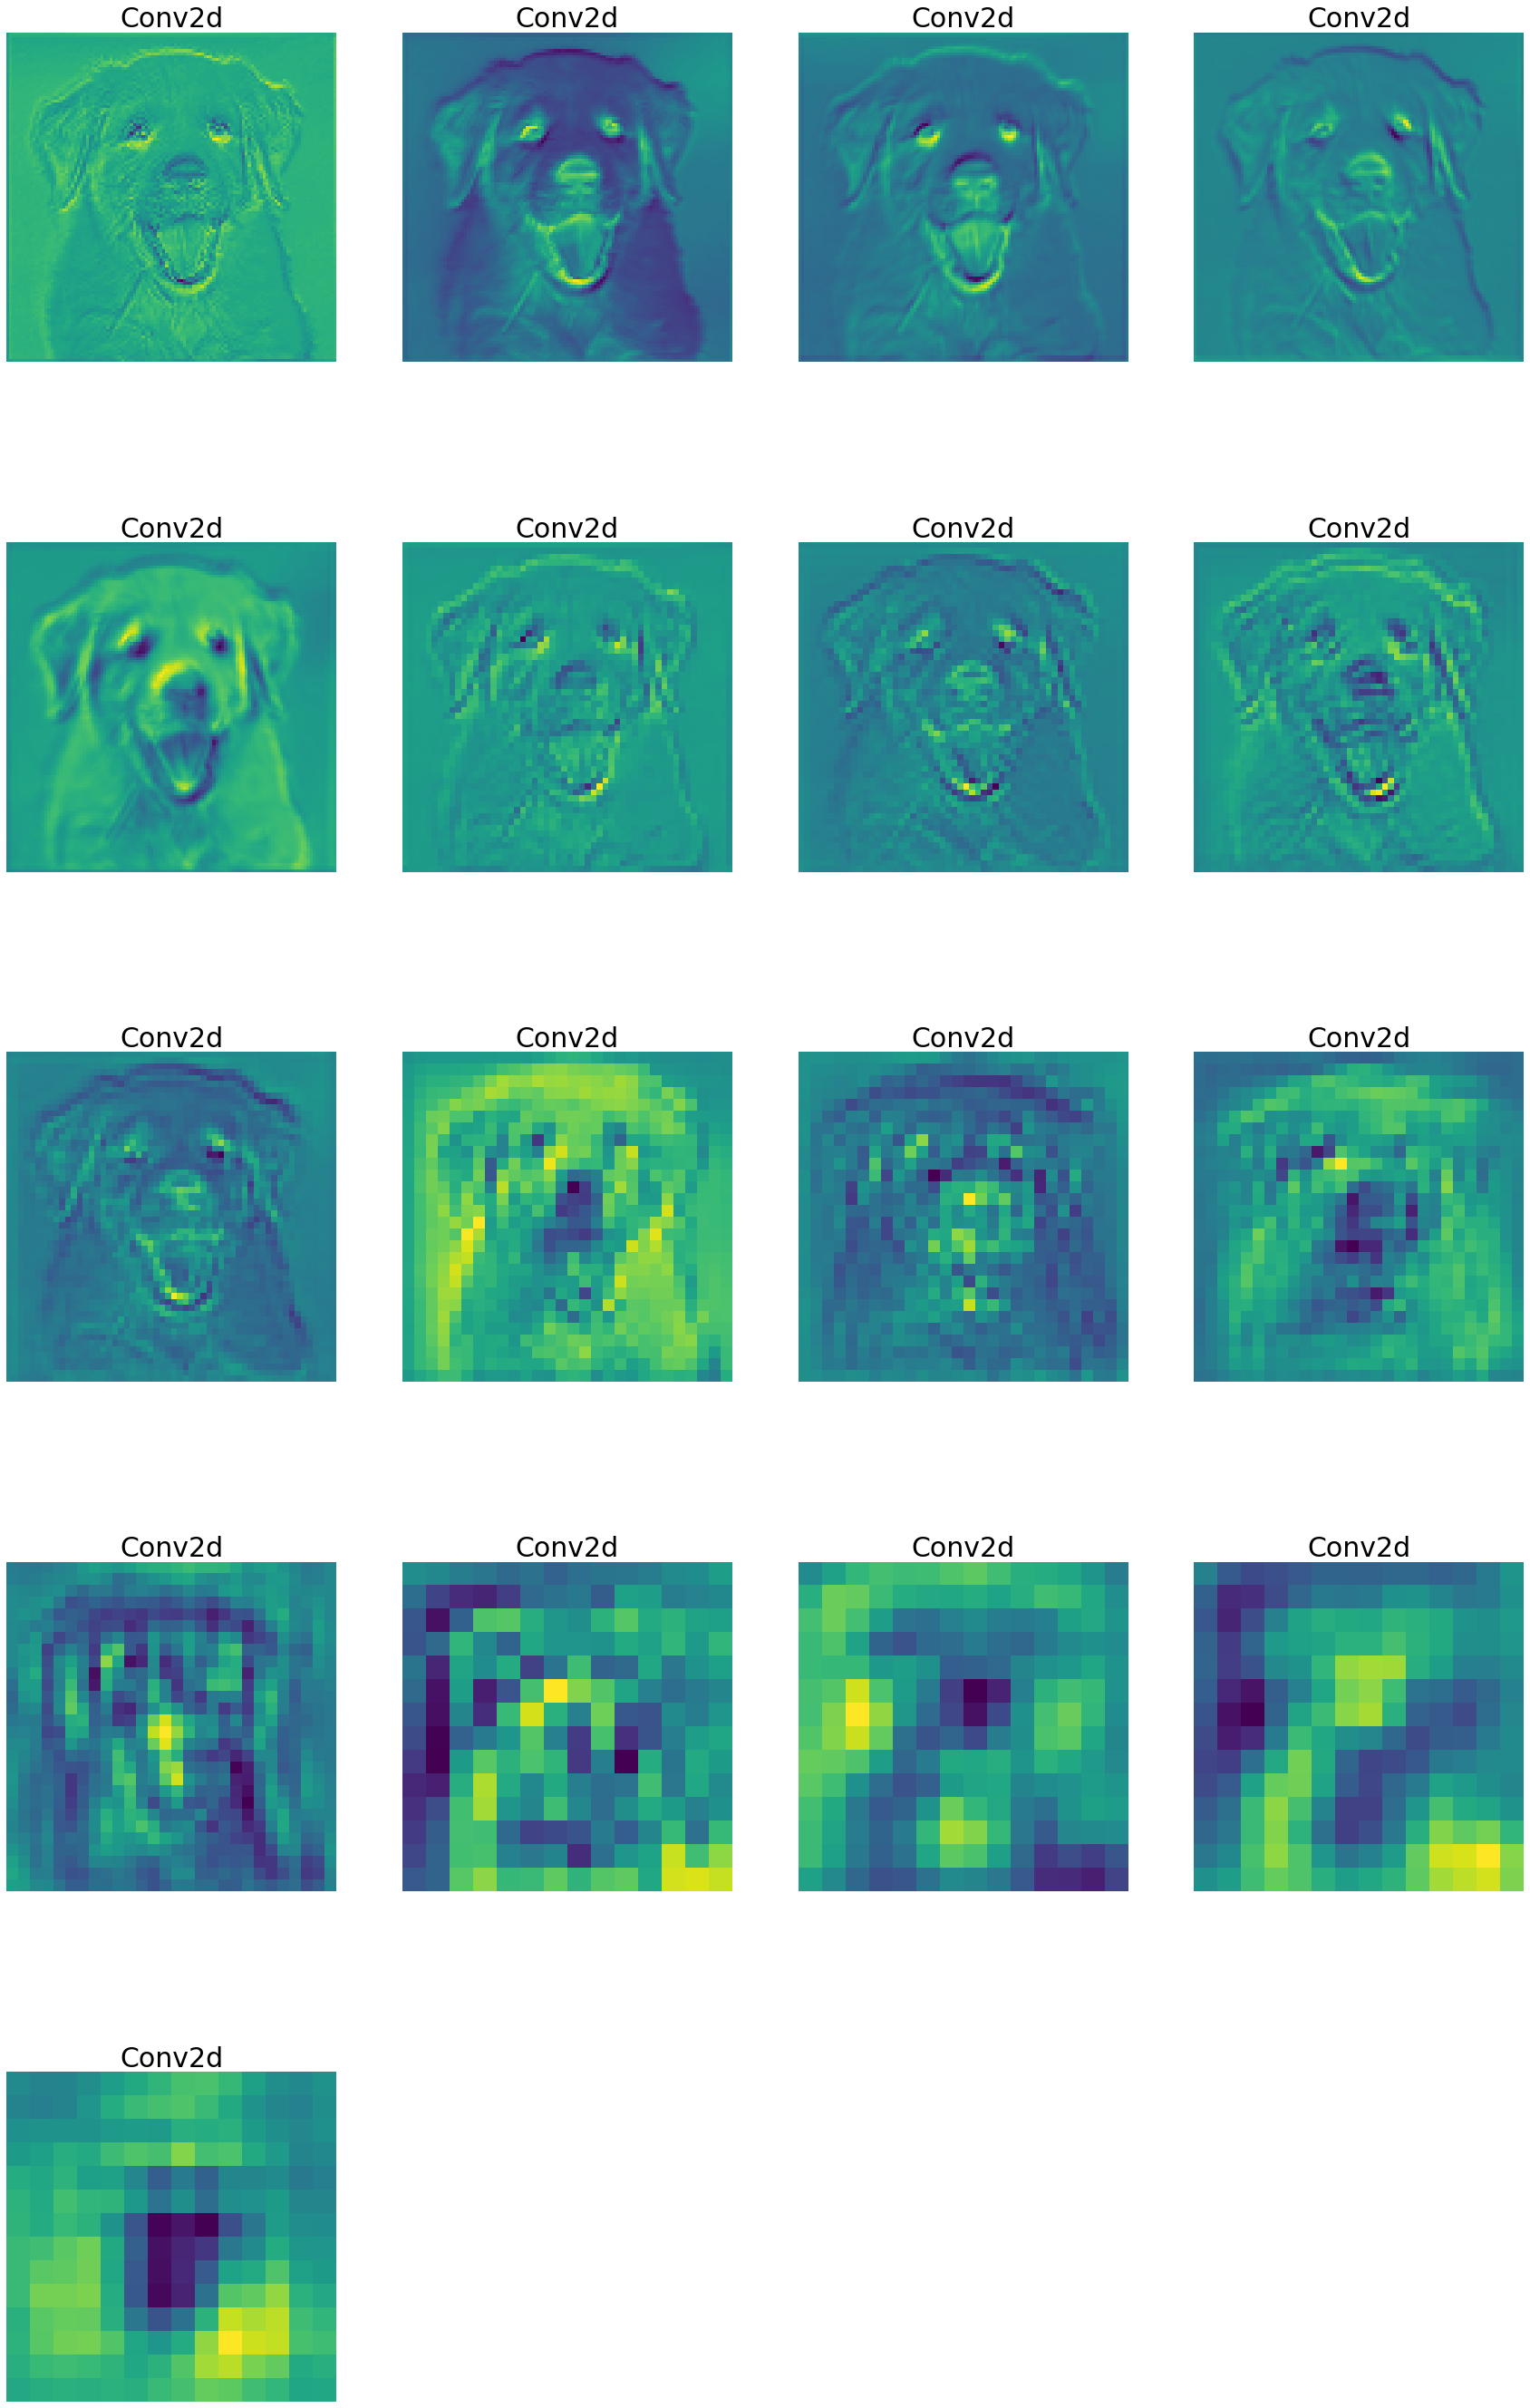

In [191]:
# Plotting feature maps and save
fig = plt.figure(figsize=(30, 50))
for i in range(len(processed)):
  a = fig.add_subplot(5, 4, i+1)
  imgplot = plt.imshow(processed[i])
  a.axis("off")
  a.set_title(names[i].split('(')[0], fontsize=30)
plt.savefig(PATH+str('feature_maps.jpg'), bbox_inches='tight')